# Klasyfikacja za pomocą sieci neuronowych

## Import bibliotek i wczytanie danych

Do treningu wykorzystuję zbiór danych MNIST zawierający 70000 zdjęć odręcznie napisanych cyfr. Każda cyfra jest reprezentowana jako tablica 28x28 pikseli w odcieniach szarości. Każdy piksel przyjmuje wartość od 0-255.

Zbiór treningowy to 60000 cyfr, a testowy 10000.

In [10]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Przygotowanie danych

Przykładowe liczby można wyświetlić wykorzystując metodę **imshow()** z biblioteki **matplotlib**.

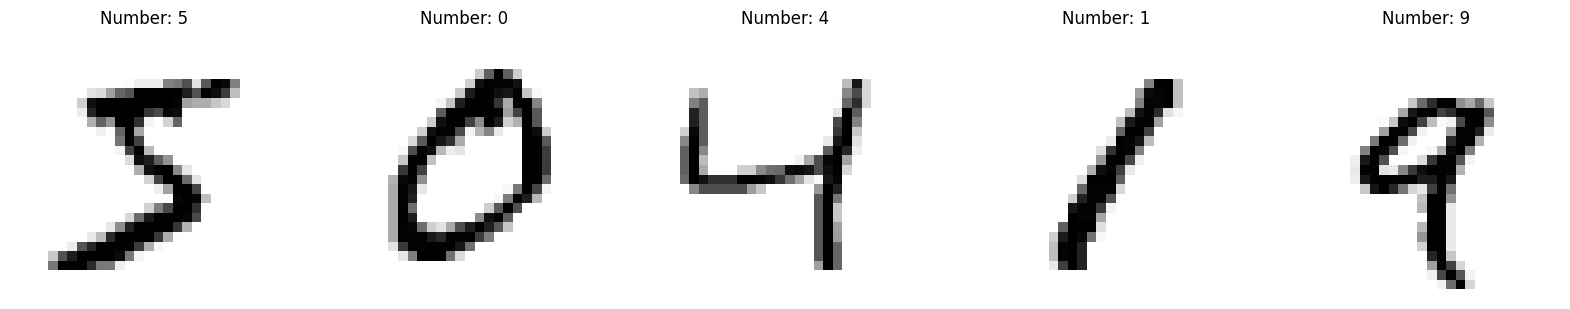

In [11]:
numsToShow = 5

fg, ax = plt.subplots(1, numsToShow, figsize=(20, 10))

for i in range(numsToShow):
    ax[i].axis('off')

    ax[i].set_title(f"Number: {y_train[i]}")
    ax[i].imshow(x_train[i], cmap=plt.cm.binary)

Dane do trenowania sieci neuronowej należy znormalizować tzn, przekształcić wartości do przedziału [0, 1]. Można to osiągnąć dzieląc przez 255. Dodatkowo zmieniam typ danych na float32, ponieważ to domyślna precyzja w GPU.

In [12]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

## Uczenie modelu

Do utworzenia modelu używa się klasy **Sequential()**, która jako argument pobiera tablicę. Każdy element tablicy to jedna warstwa sieci neuronowej.

Model składa się z 3 warstw:
* Warstwa wejściowa **Input**, która wprowadza dane do sieci. Jako argument podaje **shape**, czyli kształt pojedyńczego zdjęcia.
* Warstwa ukryta **Dense** zawierająca 64 perceptrony i używająca funkcji aktywacji **relu**.
* Warstwa wyjściowa, która zawiera 10 perceptronów (bo mamy 10 cyfr). FUnkcją aktywacji jest **softmax**, która zwraca rozkład prawdopodobieństwa.

Dodatkowo po warstwie **Input** podaję funkcję **Flatten()**, która przekształca macierz 28x28 na jednowymiarowy tensor. Alternatywnie można przekształcić zbiory treningowe za pomocą **np.reshape()** z tablic 28x28 na tablicę 784x1.

In [13]:
model = Sequential([
    Input(x_train.shape[1:]),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Teraz gdy struktura jest gotowa, model należy skompilować za pomocą **compile()**. Przyjmuje ona 3 argumenty:
* optimizer odpowiada za aktualizowanie wag sieci na podstawie gradientów,
* loss mierzy, jak bardzo przewidywania sieci różnią się od prawdziwych etykiet,
* metrics to wskaźniki, obserowowane podczas treningu (np. dokładność).

Następnie model należy wytrenować za pomocą metody **fit()**, która przyjmuje jako argumenty:
* zbiory treningowe,
* epochs - liczbę epok,
* batch_size - rozmiar batcha (domyślnie 32).
* validation_data lub validation_split - dane które służą do mierzenia metryk.

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9140 - loss: 0.3031 - val_accuracy: 0.9505 - val_loss: 0.1684
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1516 - val_accuracy: 0.9609 - val_loss: 0.1275
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1106 - val_accuracy: 0.9684 - val_loss: 0.1075
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 0.0861 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0695 - val_accuracy: 0.9719 - val_loss: 0.0901
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9738 - val_loss: 0.0864
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0477 - val_accuracy: 0.9745 - val_loss: 0.0862
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0423 - 

## Mierzenie skuteczności modelu

Na początku można wygenerować wykresy pokazujące zmianę dokładności i funkcji straty w kolejnych epokach.

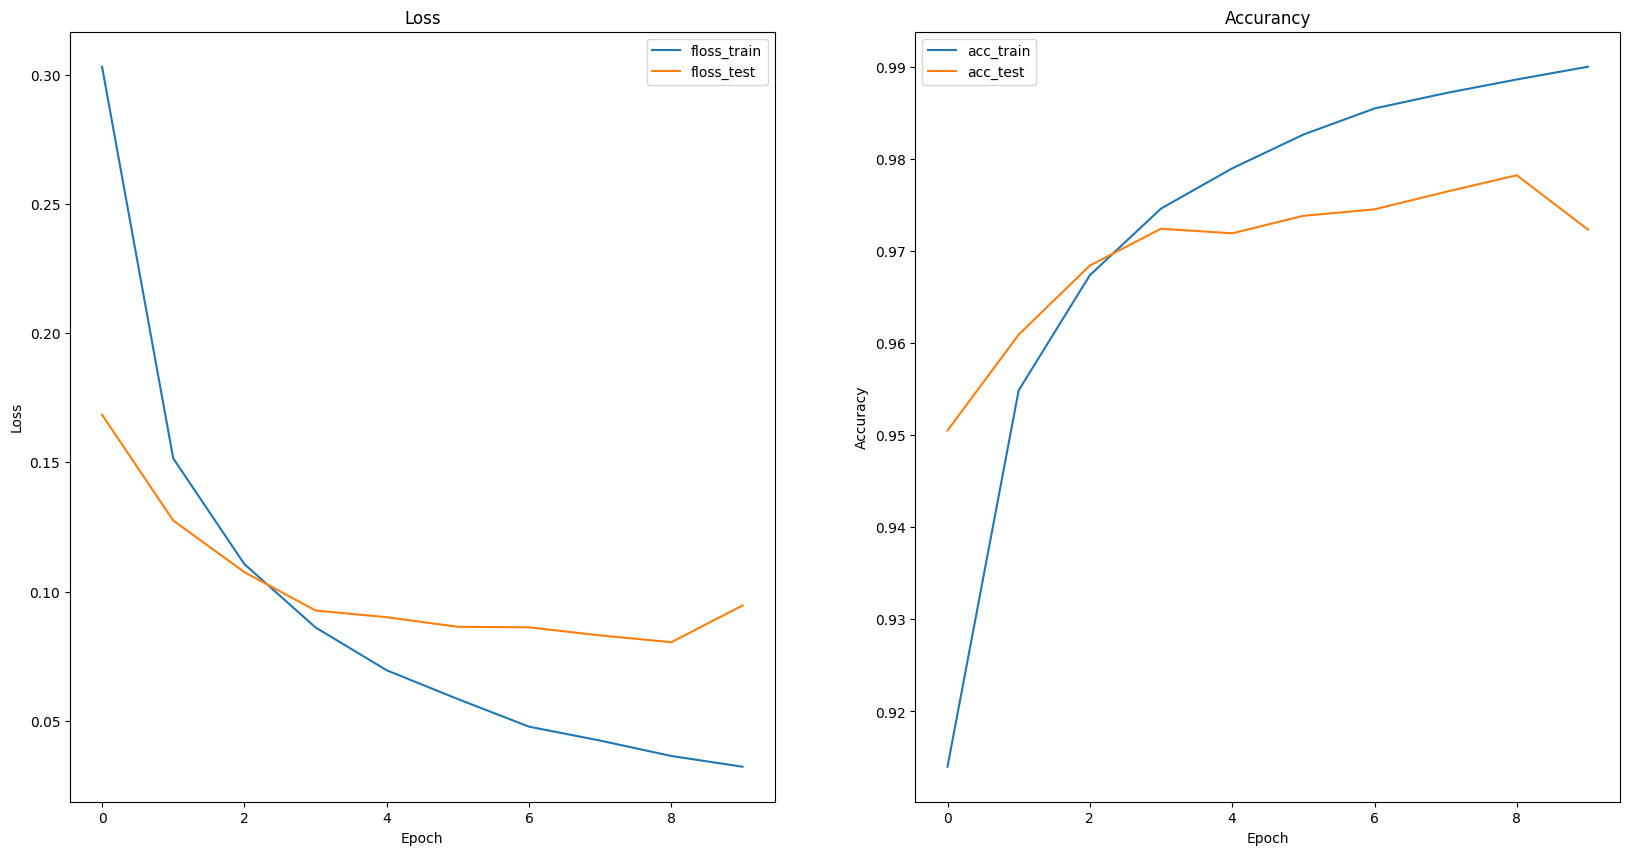

In [15]:
floss_train = history.history['loss']
floss_test = history.history['val_loss']
acc_train = history.history['accuracy']
acc_test = history.history['val_accuracy']

fig, ax = plt.subplots(1,2, figsize=(20,10))
epo = np.arange(0, len(floss_train))
ax[0].plot(epo, floss_train, label = 'floss_train')
ax[0].plot(epo, floss_test, label = 'floss_test')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epo, acc_train, label = 'acc_train')
ax[1].plot(epo, acc_test, label = 'acc_test')
ax[1].set_title('Accurancy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

Potem dokonuję predykcji zbioru testowego i generuję macierz pomyłek.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


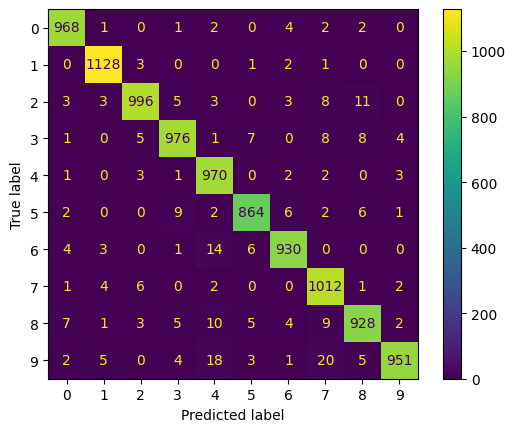

In [16]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Można również wyświetlić kilka liczb źle przewidzianych przez model.

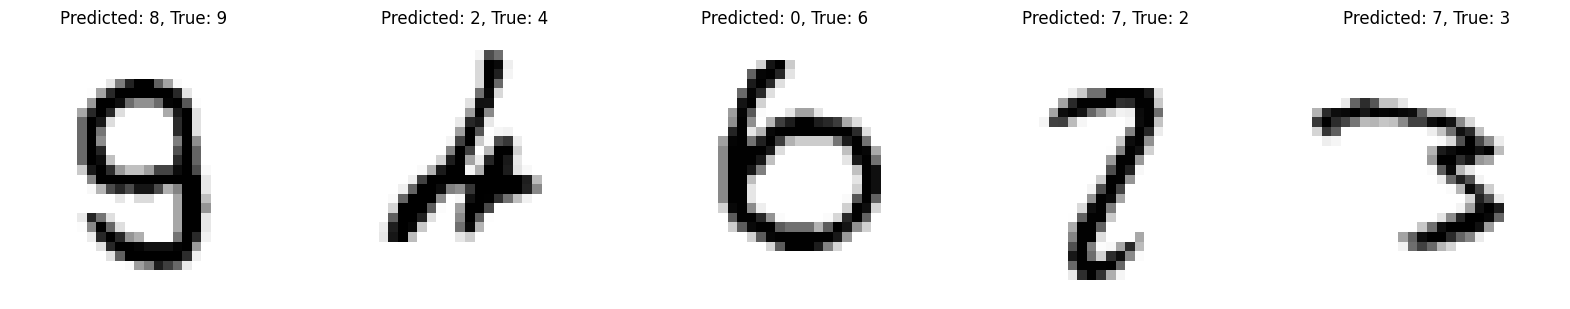

In [17]:
incorrect = list(np.where(y_pred_classes != y_test))[0]
numsToShow = 5

fg, ax = plt.subplots(1, numsToShow, figsize=(20, 10))

for i in range(numsToShow):
    incorrect_index = incorrect[i]

    ax[i].axis('off')

    ax[i].set_title(f"Predicted: {y_pred_classes[incorrect_index]}, True: {y_test[incorrect_index]}")
    ax[i].imshow(x_test[incorrect_index], cmap=plt.cm.binary)


Dla problemów klasyfikacyjnych można również wygenerować raport za pomocą **classification_report()** z biblioteki scikit-learn.

In [18]:
print(f"Liczba źle przewidzianych liczb: {len(incorrect)}/{len(x_test)}")
print(classification_report(y_test, y_pred_classes))

Liczba źle przewidzianych liczb: 277/10000
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

